In [1]:
# load module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  load data
customers_data = pd.read_csv(r"D:\Blinkit Data Analysis\Excel Data\blinkit_customers.csv")
orders_data = pd.read_csv(r"D:\Blinkit Data Analysis\Excel Data\blinkit_orders.csv")
order_items = pd.read_csv(r"D:\Blinkit Data Analysis\Excel Data\blinkit_order_items.csv")
products = pd.read_csv(r"D:\Blinkit Data Analysis\Excel Data\blinkit_products.csv")

In [3]:
orders_data["order_date"] = orders_data['order_date'].astype("datetime64[ns]")

In [4]:
orders_data['order_date_hour'] = orders_data['order_date'].dt.hour

In [5]:
orders_data['order_date_hour'].value_counts()

order_date_hour
8     240
13    239
19    228
20    227
18    226
0     221
7     217
5     216
4     215
23    213
1     209
6     204
15    204
17    204
10    203
2     200
22    198
16    197
14    197
21    195
12    193
3     189
11    184
9     181
Name: count, dtype: int64

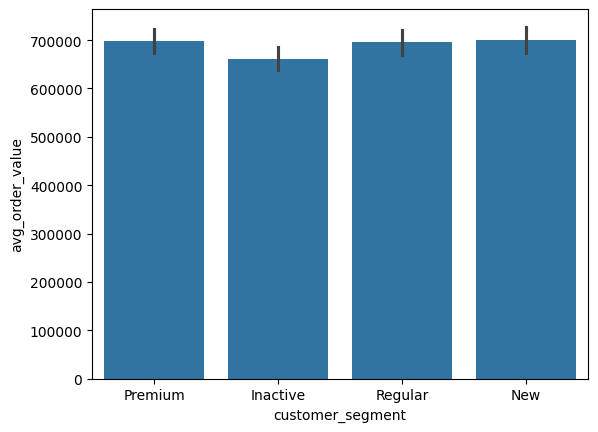

In [7]:
sns.barplot(x= "customer_segment",y = "avg_order_value",data=customers_data,estimator="sum")
plt.show()

In [8]:
# Which products frequently go out of stock or have excess inventory?
temp_join = pd.merge(products,order_items,on="product_id",how="outer")
for i,j in enumerate((temp_join['quantity']== temp_join["max_stock_level"]).values) :
    if j :
        print(i)
print("No any Product out of stock")

No any Product out of stock


In [9]:
# top 1 selling products
temp_join = pd.merge(products,order_items,on="product_id",how="outer")
temp_join.sort_values(by="quantity",ascending=False,inplace=True)
print("top 1 selling products")
for no,name in enumerate(temp_join[:1]["product_name"].values) :
    print(no+1,name)

top 1 selling products
1 Pulses


In [10]:
# show data column name
orders_data.columns
# data type casting
orders_data['order_date'] = orders_data['order_date'].astype("datetime64[ns]")

In [11]:
orders_data['order_date_hour'] = orders_data['order_date'].dt.hour
orders_data['order_date_day_name'] = orders_data['order_date'].dt.day_name()

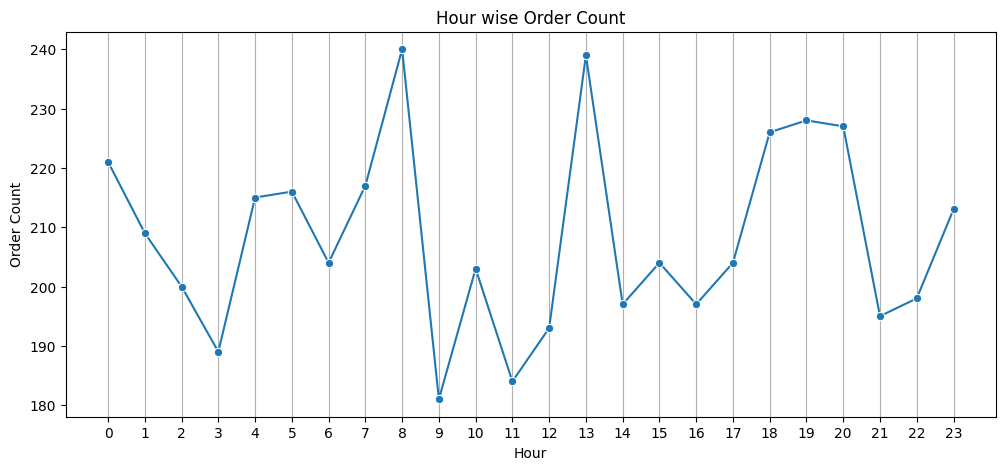

In [24]:
# What are the common trends in customer purchase behaviour ? 
plt.figure(figsize=(12,5))
temp = pd.DataFrame(orders_data['order_date_hour'].value_counts()).sort_values(by="order_date_hour")
sns.lineplot(x = "order_date_hour",y="count",data=temp,marker = "o")
plt.xticks([i for i in range(24)])
plt.grid(axis="x")
plt.ylabel("Order Count")
plt.xlabel("Hour")
plt.title("Hour wise Order Count")
plt.savefig("Hour wise Order Count.jpg")
plt.show()

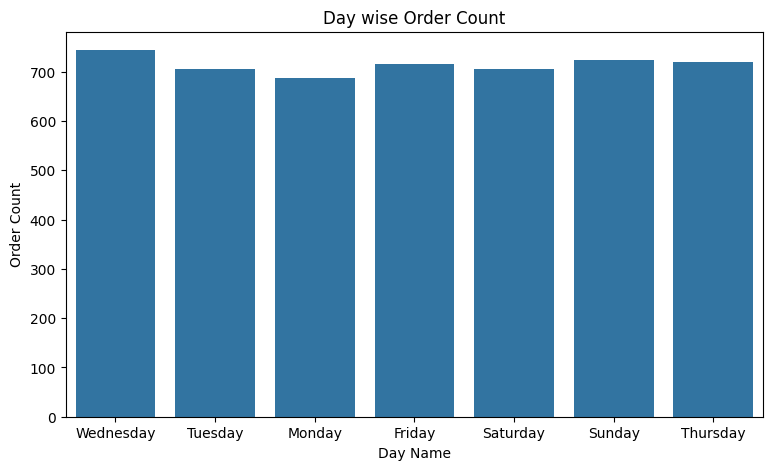

In [13]:
# What are the common trends in customer purchase behaviour ? 
plt.figure(figsize=(9,5))
sns.countplot(x = "order_date_day_name",data=orders_data)
plt.ylabel("Order Count")
plt.xlabel("Day Name")
plt.title("Day wise Order Count")
plt.show()

In [14]:
# show data column name
customers_data.columns

Index(['customer_id', 'customer_name', 'email', 'phone', 'address', 'area',
       'pincode', 'registration_date', 'customer_segment', 'total_orders',
       'avg_order_value'],
      dtype='object')

In [15]:
# Who are Blinkit's most valuable customers?
customers_data.sort_values(by="total_orders",ascending=False,inplace=True)
print("Top 5 Most Valuable Customers According to Total Order")
for no,name in enumerate(customers_data[:5]["customer_name"].values) :
    print(no+1,name)

Top 5 Most Valuable Customers According to Total Order
1 Thomas Walia
2 Udarsh Rao
3 Ojas Gour
4 Mitesh Sehgal
5 Ayush Tripathi


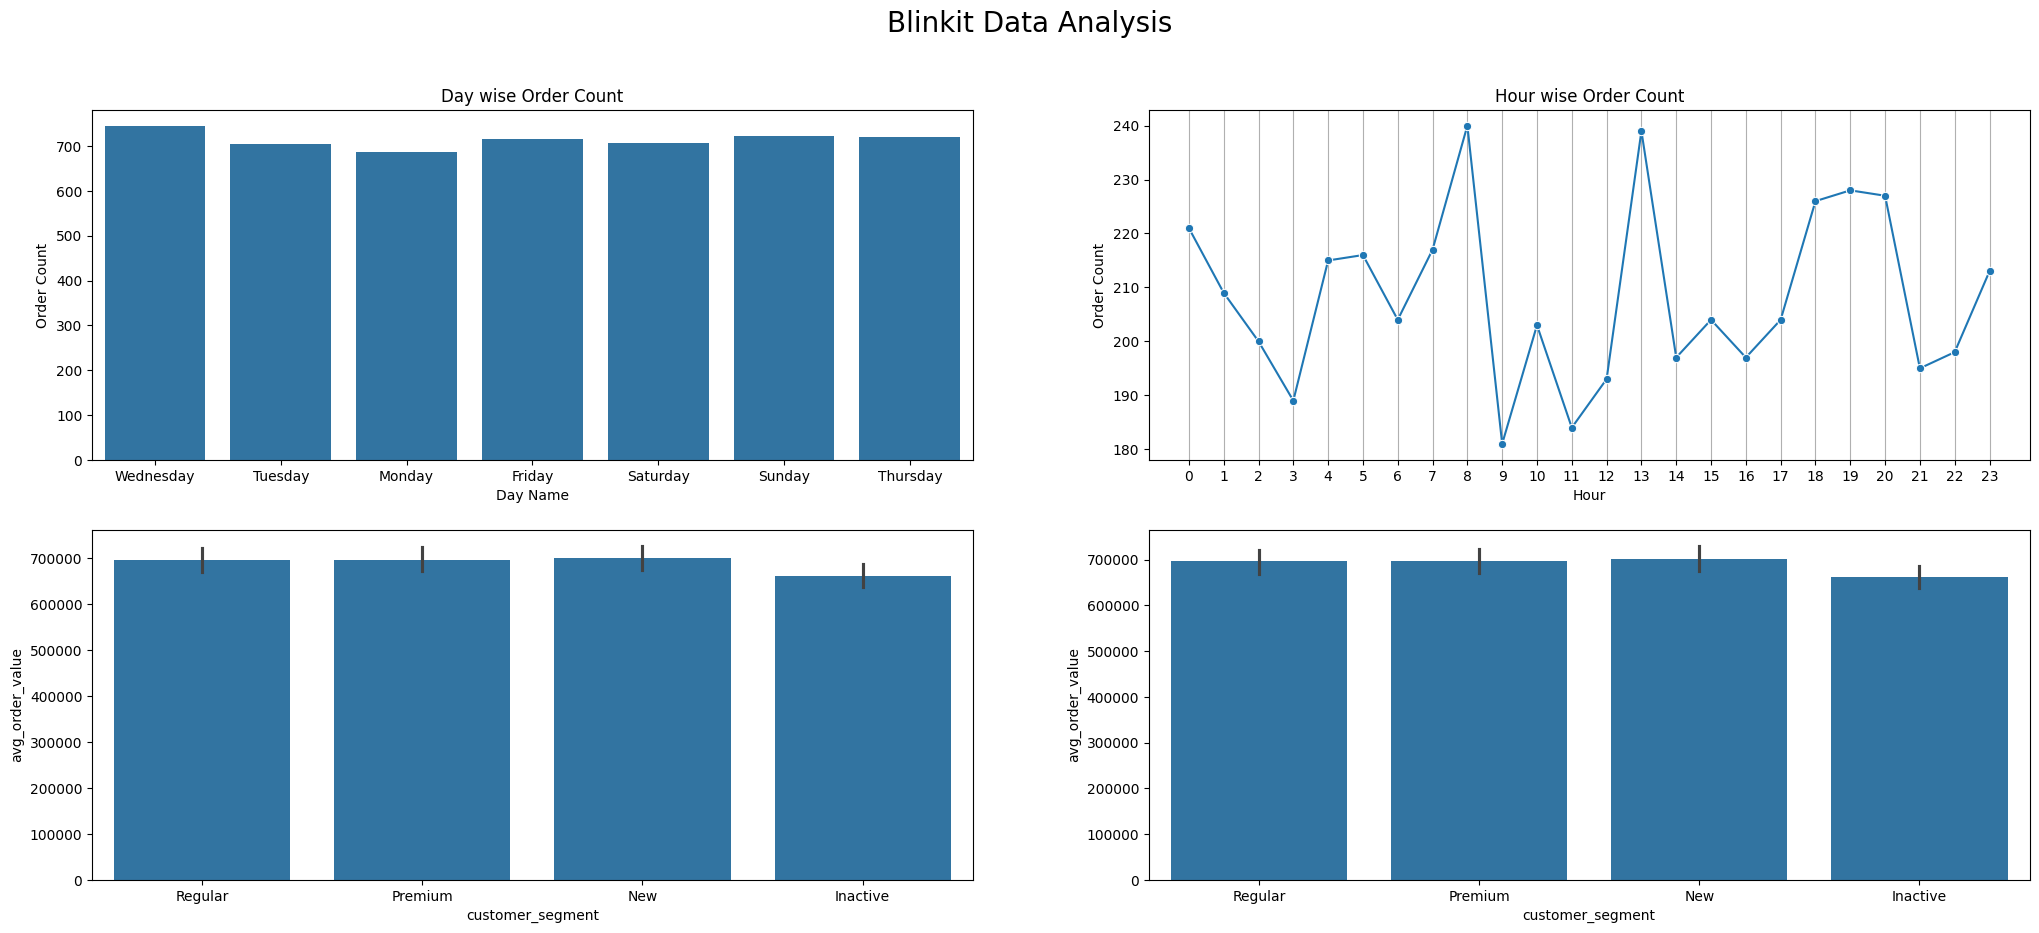

In [23]:
# final dashboard
plt.figure(figsize=(25,10))


plt.subplot(2,2,1) # no of row ,  no of col ,  graph no
sns.countplot(x = "order_date_day_name",data=orders_data)
plt.ylabel("Order Count")
plt.xlabel("Day Name")
plt.title("Day wise Order Count")

plt.subplot(2,2,2) # no of row ,  no of col ,  graph no
temp = pd.DataFrame(orders_data['order_date_hour'].value_counts()).sort_values(by="order_date_hour")
sns.lineplot(x = "order_date_hour",y="count",data=temp,marker = "o")
plt.xticks([i for i in range(24)])
plt.grid(axis="x")
plt.ylabel("Order Count")
plt.xlabel("Hour")
plt.title("Hour wise Order Count")

plt.subplot(2,2,3) # no of row ,  no of col ,  graph no
sns.barplot(x= "customer_segment",y = "avg_order_value",data=customers_data,estimator="sum")

plt.subplot(2,2,4) # no of row ,  no of col ,  graph no
sns.barplot(x= "customer_segment",y = "avg_order_value",data=customers_data,estimator="sum")

plt.suptitle("Blinkit Data Analysis",fontsize = 20)

plt.savefig("Blinkit Data Analysis.jpg")
plt.show()